In [15]:
from denoise import denoise
from preprocess import prep
from getReg import getregressors, pulse_detect

## Test1.1 
Choose the time to be in the middle of scanning.
The difference is in 'getReg'

In [11]:
prep('/Users/xinyi/Desktop/project/subject/sub01.nii','/Users/xinyi/Desktop/project/subject/struct.nii','test/1.1')

220725-13:58:43,636 nipype.workflow INFO:
	 Workflow preproc settings: ['check', 'execution', 'logging', 'monitoring']
220725-13:58:43,659 nipype.workflow INFO:
	 Running serially.
220725-13:58:43,666 nipype.workflow INFO:
	 [Node] Setting-up "_img2float0" in "/private/var/folders/m4/9tqx2h0977b4g9l7n72kv3280000gn/T/tmpvkid1n01/preproc/img2float/mapflow/_img2float0".
220725-13:58:43,670 nipype.workflow INFO:
	 [Node] Executing "_img2float0" <nipype.interfaces.fsl.utils.ImageMaths>
220725-13:59:21,962 nipype.workflow INFO:
	 [Node] Finished "_img2float0", elapsed time 38.289636s.
220725-13:59:21,970 nipype.workflow INFO:
	 [Node] Setting-up "preproc.extractref" in "/private/var/folders/m4/9tqx2h0977b4g9l7n72kv3280000gn/T/tmpwh03f7p9/preproc/extractref".
220725-13:59:21,975 nipype.workflow INFO:
	 [Node] Executing "extractref" <nipype.interfaces.fsl.utils.ExtractROI>
220725-13:59:28,855 nipype.workflow INFO:
	 [Node] Finished "extractref", elapsed time 6.87765s.
220725-13:59:28,871 nipyp

/Users/xinyi/Documents/GitHub/fMRI-PhysioNoise/getReg.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  hist = np.asarray(hist)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

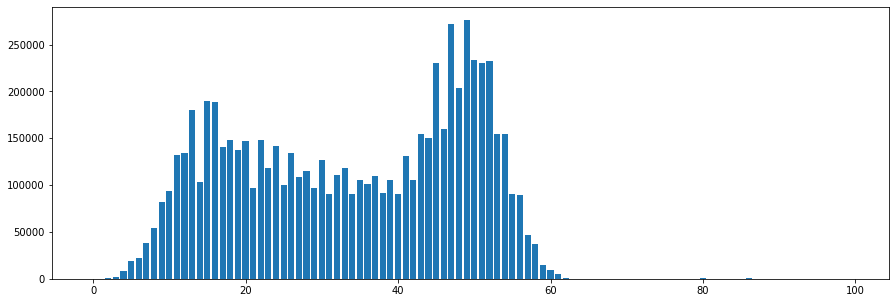

In [16]:
getregressors('/Users/xinyi/Desktop/project/subject/pulse_resp1_Sub1_10june2022_raw.txt','test/1.1',1.7,2,10000)

In [17]:
import pandas as pd
regressors = pd.read_csv('test/1.1/physio/mri_pulse.csv')
regressors

,0
0,196318.0
1,213318.0
2,230318.0
3,247318.0
4,264318.0
...,...
395,6911353.0
396,6928353.0
397,6945353.0
398,6962353.0


In [18]:
import numpy as np
txtpath = '/Users/xinyi/Desktop/project/subject/pulse_resp1_Sub1_10june2022_raw.txt'
# Open the txt file
with open(txtpath, "r+") as f:
    d = f.readlines()

# Remove the head infos 
for i in np.arange(11):
    d.pop(0)

# Split values into colums
dataset = []
for str in d:
    row = str.split("\t")
    if row[0] == '':
        break
    dataset.append([float(i) for i in row[:3]])

In [19]:
import pandas as pd
from getReg import pulse_detect


In [20]:
df = pd.DataFrame(dataset)
df.columns = ['ppg','respiration','mri']

tag, n_scan = pulse_detect(df['mri'], 'test/mri_test',1.7)


FileNotFoundError: [Errno 2] No such file or directory: 'test/mri_test/mri_pulse.csv'

In [ ]:
ta